# SeSiMe
### Sentence/Sequence Similarity Measure

### (2) Mass spec side
Import MS data and create documents.

Here: Use NOT Crusemann data, but other dataset where smilea are known for all spectra.
### here: GNPS Dataset of 11134 spectra with smiles.

In [1]:
# data locations
# Windows 
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\labeled_MS_data\\"
PATH_SAVE_DATA = ROOT + "\\SeSiMe\\data\\"
PATH_SESIME = ROOT + "\\SeSiMe\\"

PATH_NPLINKER = ROOT + "\\nplinker\\prototype\\"
#mgf_file = PATH_MS_DATA + "GNPSLibraries_allSMILES.mgf"
mgf_file = PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs.mgf"

In [2]:
# import general packages
import sys
sys.path.insert(0, PATH_NPLINKER)
sys.path.insert(0, PATH_SESIME)

import helper_functions as functions
import MS_functions

import numpy as np
from metabolomics import load_spectra

In [3]:
# Import / Load data
results_file = "filtered_data_test.json"

spectra, spectra_dict, MS_documents, MS_documents_intensity = MS_functions.load_MGF_data(PATH_SAVE_DATA,
                  mgf_file, 
                 results_file = results_file,
                 num_decimals = 2,
                 min_frag = 0.0, max_frag = 1000.0,
                 min_loss = 10.0, max_loss = 200.0,
                 exp_intensity_filter = 0.01,
                 min_peaks = 10,
                 peaks_per_mz = 20/200)

Spectra json file found and loaded.


## Documents

+ Peaks were removed using an exponential fit to the peak intensity distribution. 
+ Words were created using 2 decimals.

In [4]:
# Have a look at how a document looks like:
print(MS_documents[0])

['peak_74.73', 'peak_79.02', 'peak_89.02', 'peak_89.04', 'peak_90.05', 'peak_95.05', 'peak_98.98', 'peak_105.04', 'peak_107.05', 'peak_117.03', 'peak_118.04', 'peak_134.67', 'peak_135.05', 'peak_135.28', 'peak_136.05', 'peak_137.00', 'peak_137.15', 'peak_145.03', 'peak_147.12', 'peak_160.09', 'peak_161.08', 'peak_162.59', 'peak_163.04', 'peak_163.08', 'peak_163.29', 'peak_164.04', 'peak_165.00', 'peak_165.40', 'peak_166.30', 'peak_167.15', 'peak_168.17', 'peak_172.58', 'peak_175.08', 'peak_181.06', 'peak_229.03', 'peak_237.01', 'peak_330.10', 'peak_330.14', 'loss_93.11', 'loss_101.09', 'loss_149.06', 'loss_155.04', 'loss_157.54', 'loss_161.95', 'loss_162.97', 'loss_163.82', 'loss_164.72', 'loss_165.11', 'loss_166.08', 'loss_166.83', 'loss_167.04', 'loss_167.08', 'loss_167.53', 'loss_169.04', 'loss_170.03', 'loss_183.00', 'loss_185.09', 'loss_192.96', 'loss_193.12', 'loss_194.07', 'loss_194.84', 'loss_195.07', 'loss_195.45']


In [5]:
len(MS_documents)  # number of spectra = number of documents

9565

#### Switch to general SeSiMe functionality
Once we have a corpus (e.g. through cells above), we can use SeSiMe to apply different similarity measuring methds. 

In [6]:
from Similarities import SimilarityMeasures

MS_measure = SimilarityMeasures(MS_documents)

Using TensorFlow backend.


In [7]:
MS_measure.preprocess_documents(0.2, create_stopwords = False)

Preprocess documents...


In [8]:
print("Number of unique words: ", len(MS_measure.dictionary))

Number of unique words:  56520


## Word2Vec -based approach
### Compare different training parameters

+ Create Word2Vec based document centroid vectors based on models trained using different window sizes.

In [9]:
file_model_word2vec = PATH_SAVE_DATA + 'model_w2v_MS_gnps_uniquesmiles_d200_w150_2dec.model'
MS_measure.build_model_word2vec(file_model_word2vec, size=200, window=150, 
                             min_count=1, workers=4, iter=250, 
                             use_stored_model=True)

Load stored word2vec model ...


In [10]:
MS_measure.get_vectors_centroid(extra_weights = None, tfidf_weighted=True)
MS_measure.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  9565  of  9565  documents.Calculated distances between  9565  documents.


This has calculated (cosine) distances between all spectra in an all-vs-all fashion.
The "num_hits" closest candidates for each spectrum are listed in two matrices.

One stores the distances, the other the respective IDs.

### Compare to small window size, only taking the few next words as context.

In [19]:
MS_measure5 = SimilarityMeasures(MS_documents)
MS_measure5.preprocess_documents(0.2, create_stopwords = False)

file_model_word2vec = PATH_SAVE_DATA + 'model_w2v_MS_gnps_uniquesmiles_d200_w5.model'
MS_measure5.build_model_word2vec(file_model_word2vec, size=200, window=5, 
                             min_count=1, workers=4, iter=250, 
                             use_stored_model=True)

Preprocess documents...
Stored word2vec model not found!
Calculating new word2vec model...
 Epoch  250  of  250 .

In [20]:
MS_measure5.get_vectors_centroid(extra_weights = None, tfidf_weighted=True)
MS_measure5.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  9565  of  9565  documents.Calculated distances between  9565  documents.


### Compare to very large window size, longer train, more dimensions.
+ even larger window size 
+ less dimension reduction (here to 300 instead of 200)
+ longer training (400 instead of 250 iterations)

In [14]:
MS_measure300 = SimilarityMeasures(MS_documents)
MS_measure300.preprocess_documents(0.2, create_stopwords = False)

file_model_word2vec = PATH_SAVE_DATA + 'model_w2v_MS_gnps_uniquesmiles_d300_w300.model'
MS_measure300.build_model_word2vec(file_model_word2vec, size=300, window=300, 
                             min_count=1, workers=4, iter=400, 
                             use_stored_model=True)

Preprocess documents...
Stored word2vec model not found!
Calculating new word2vec model...
 Epoch  400  of  400 .

In [15]:
MS_measure300.get_vectors_centroid(extra_weights = None, tfidf_weighted=True)
MS_measure300.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  9565  of  9565  documents.Calculated centroid vectors for  750  of  9565  documents.920  of  9565  documents.  of  9565  documents.Calculated distances between  9565  documents.


In [16]:
MS_measure.Cdistances_ctr_idx[1,:]

array([   1, 1671, 2039, 8757,  359, 1444,   68, 1514, 5242,  137, 5147,
       9129, 1017, 1091, 1436,  162, 1048, 1064,  619,  933,  144, 1638,
       2037, 1901, 1993])

In [17]:
MS_measure300.Cdistances_ctr_idx[1,:]

array([   1, 1444,  454, 1901,  892, 1017,  660,  619,  144, 5242,  365,
       1671, 5094,  137, 2079,  933, 2166, 1514, 9138, 2082,   68,  359,
       1391, 1982, 1198])

In [21]:
MS_measure5.Cdistances_ctr_idx[1,:]

array([   1,  137,   68, 5147, 5242,   56, 2315, 8757,  454, 2443,  304,
         79,   61,  953, 1901, 2079,  660,  244, 6220,   30, 6287,  145,
       1516, 2415, 1107])

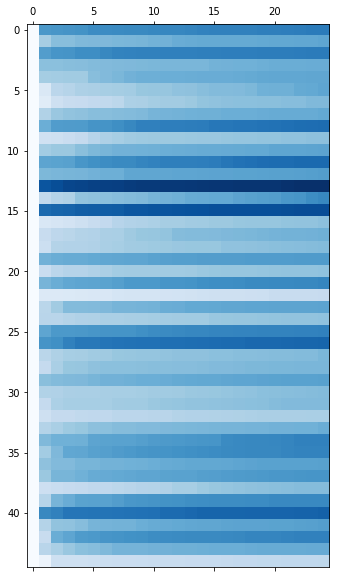

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(MS_measure5.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

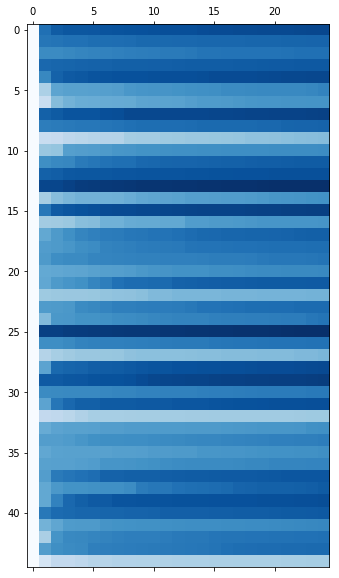

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(MS_measure300.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

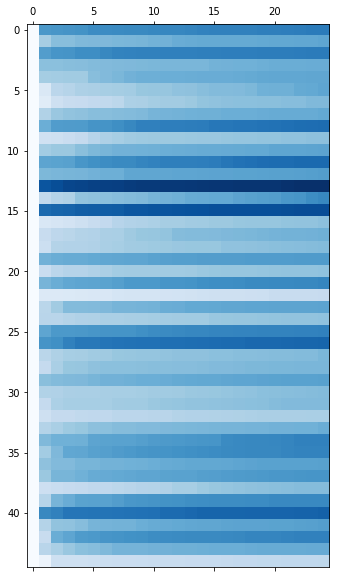

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(MS_measure5.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

### Plot molecules from smiles to visually compare selected spectra

[ 110  527  304 8142  658 6103  244 6489 8850  877]
[0.      0.15835 0.17843 0.24431 0.24987 0.29908 0.32311 0.34886 0.36928
 0.37056]


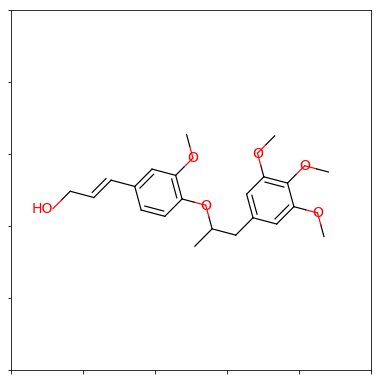

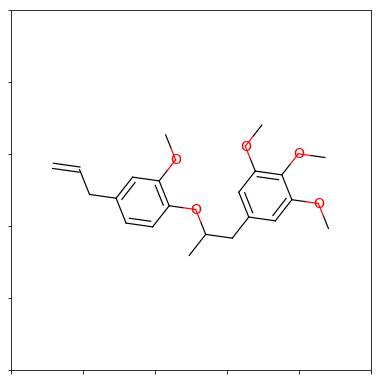

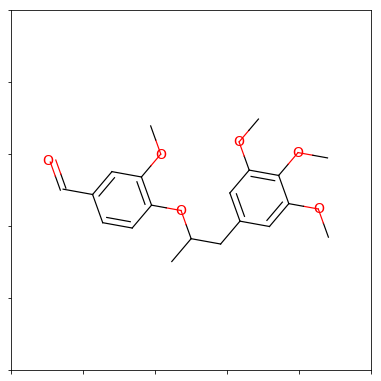

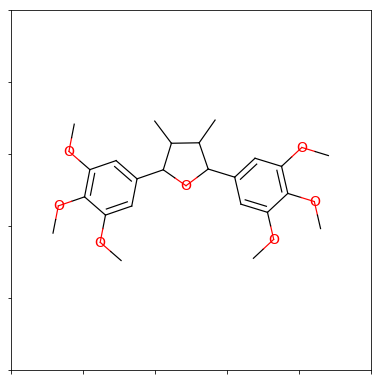

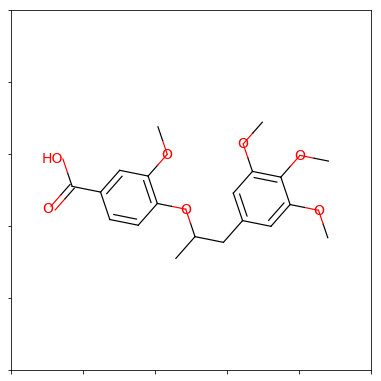

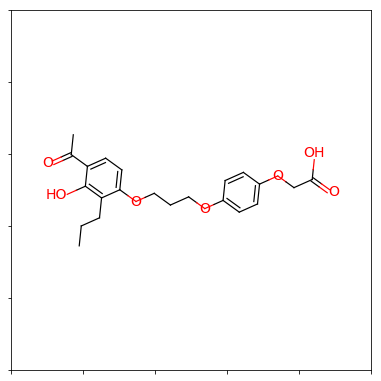

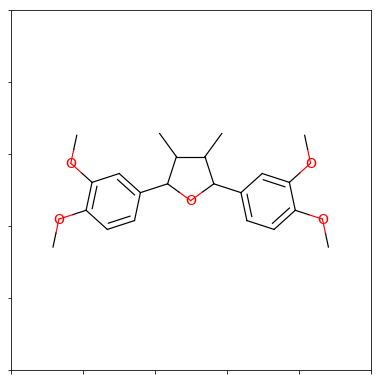

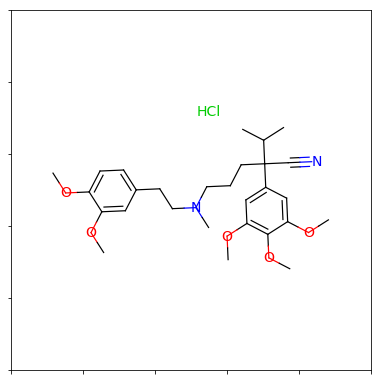

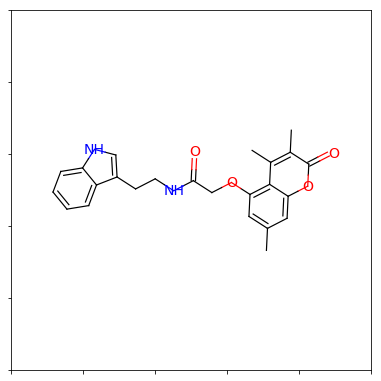

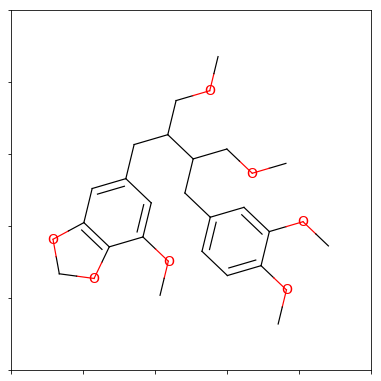

In [33]:
query_id = 110 #38 #7 #31#1110 #110
print(MS_measure.Cdistances_ctr_idx[query_id, :10])
print(np.round(MS_measure.Cdistances_ctr[query_id, :10],5))
MS_functions.plot_smiles(query_id, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

[ 110  527  304  658  498 6103  394 8104 9009  145]
[0.      0.02182 0.04772 0.07076 0.08561 0.10859 0.11288 0.13478 0.13927
 0.14672]


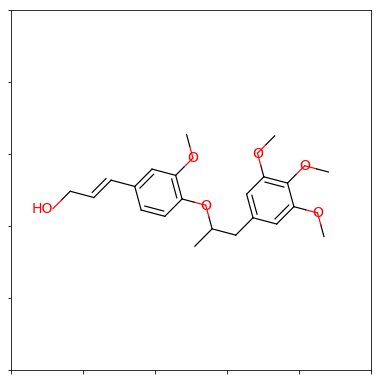

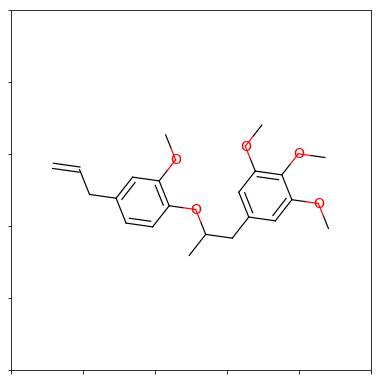

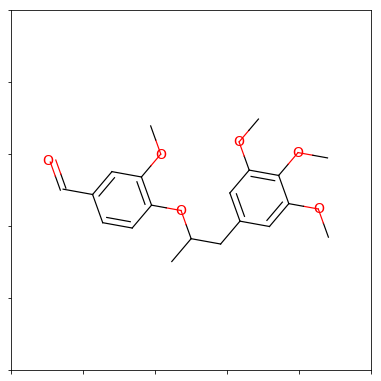

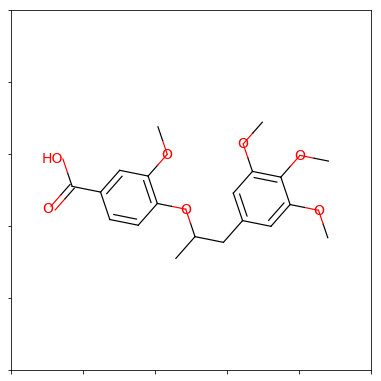

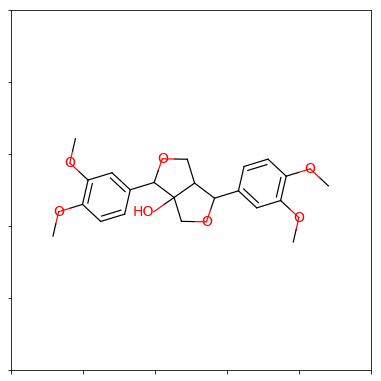

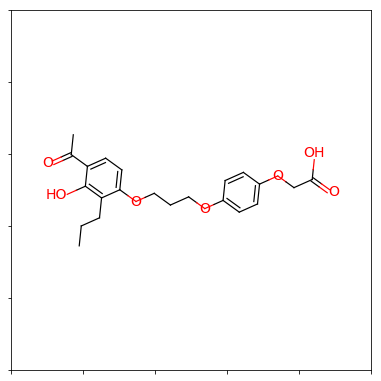

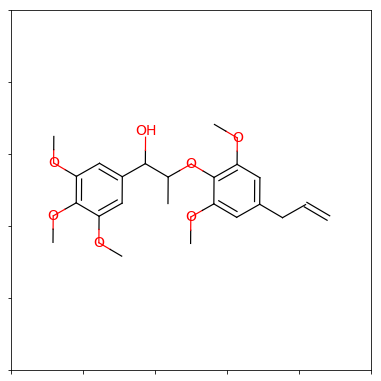

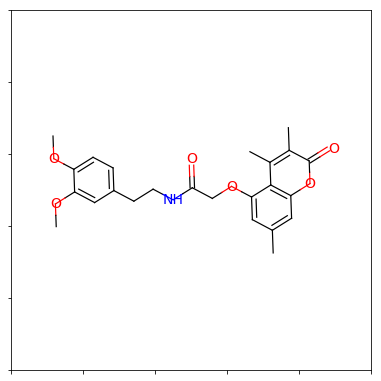

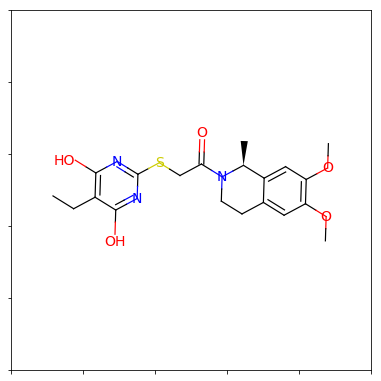

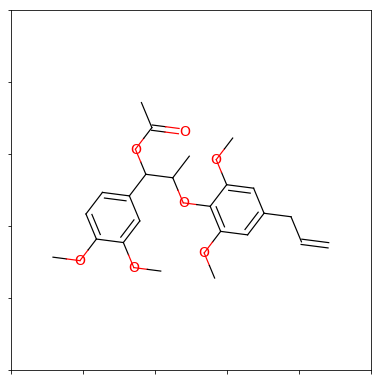

In [32]:
query_id = 110 #7 #31 #1110 # 110
print(MS_measure5.Cdistances_ctr_idx[query_id, :10])
print(np.round(MS_measure5.Cdistances_ctr[query_id, :10],5))
MS_functions.plot_smiles(query_id, spectra_dict, MS_measure5, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

[ 110  527  304  658 8142  244 6103  877 6489  498]
[0.      0.30361 0.32409 0.39401 0.4488  0.49005 0.52381 0.53828 0.55604
 0.55803]


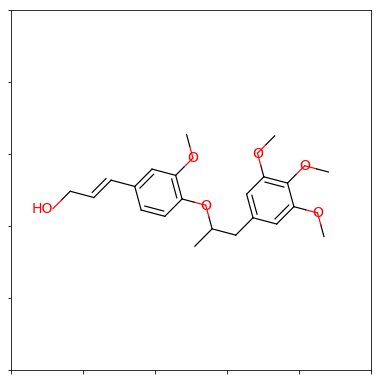

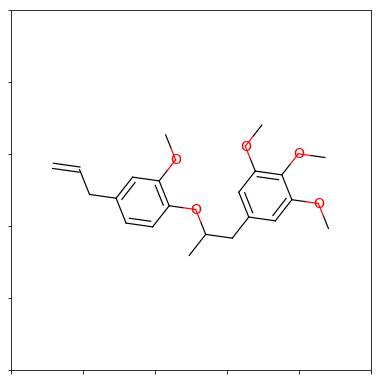

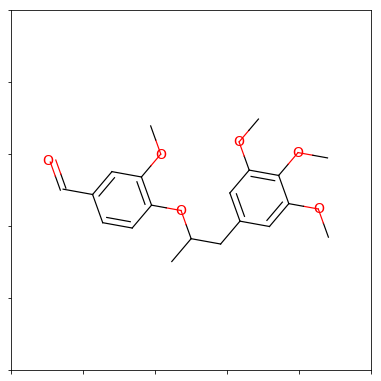

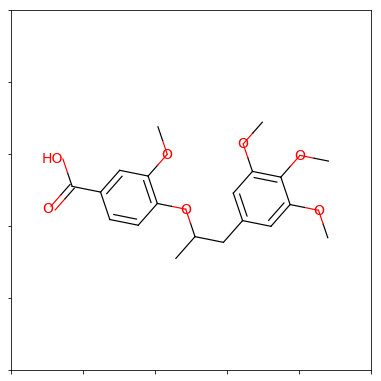

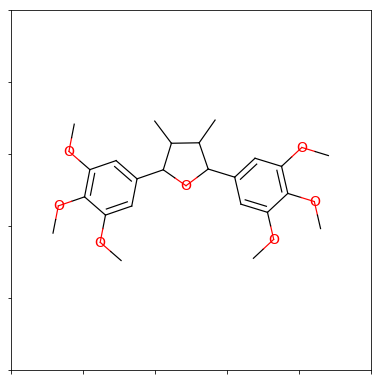

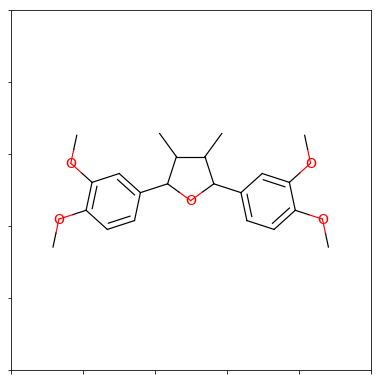

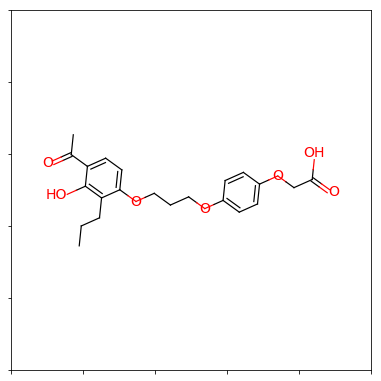

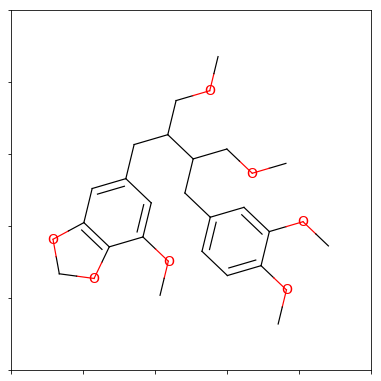

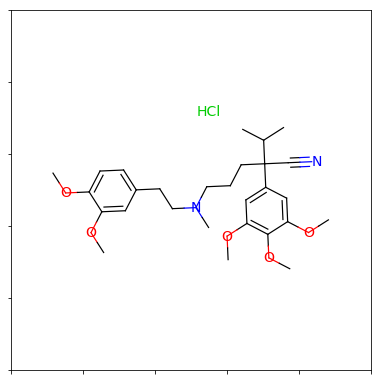

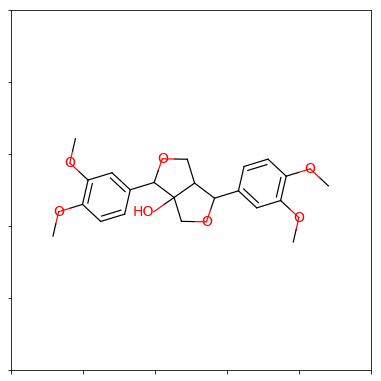

In [31]:
query_id = 110 #7 #31 #1110 # 110
print(MS_measure300.Cdistances_ctr_idx[query_id, :10])
print(np.round(MS_measure300.Cdistances_ctr[query_id, :10],5))
MS_functions.plot_smiles(query_id, spectra_dict, MS_measure300, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

## first observations
+ I was suprised that the different window sizes (5 vs 150 words) did apparently not result in any catastrophic changes...

### Try different similarity measuring methods...

#### A) Autoencoder
Will train a deep autoencoder to generate 100 dimensional (or = encoding_dim) vectors representing each document. 

In [81]:
file_model_ae = PATH_SAVE_DATA + 'model_autoencoder_MS_uniquesmiles2.h5'
file_model_encoder = PATH_SAVE_DATA + 'model_encoder_MS_uniquesmiles2.h5'
MS_measure.build_autoencoder(file_model_ae, file_model_encoder, 
                             epochs = 8, batch_size = 1024, encoding_dim = 300,
                            layer_factors = (1, 1, 1))

No stored model found!
Creating new autoencoder model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 300)               16956300  
_________________________________________________________________
dense_11 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_12 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_15 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_16 (Dense)   

In [82]:
MS_measure.get_autoencoder_distances(num_hits=25, method='cosine')

[0.00000000e+00 1.08270215e-07 1.39865922e-07 2.50640856e-07
 2.71289795e-07 2.73772700e-07 2.87246752e-07 3.04670363e-07
 3.12957884e-07 3.16611003e-07]


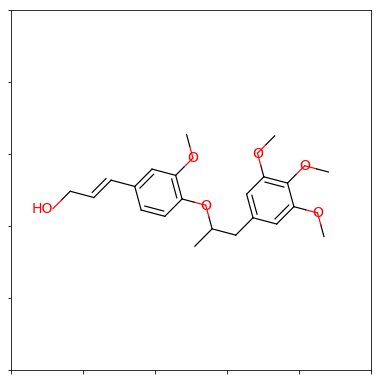

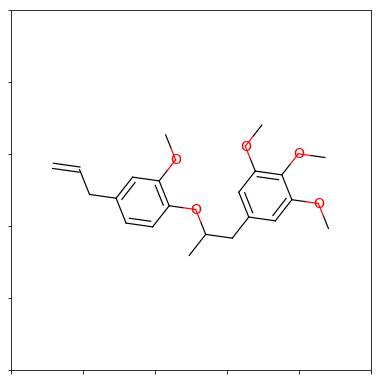

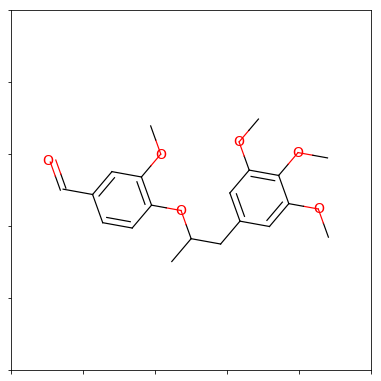

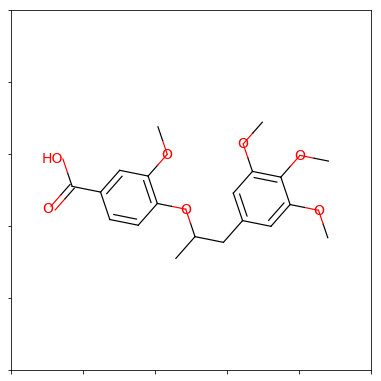

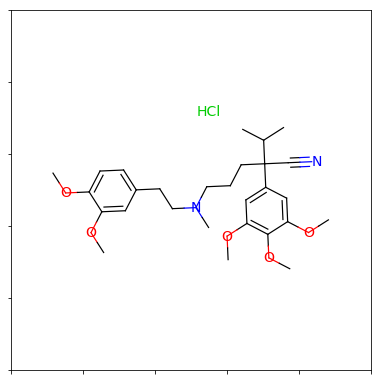

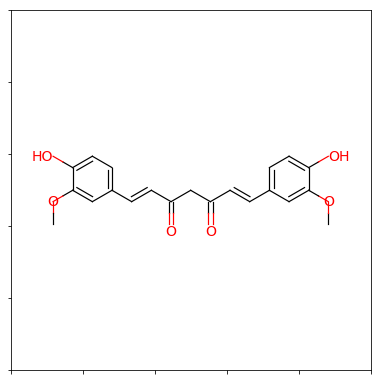

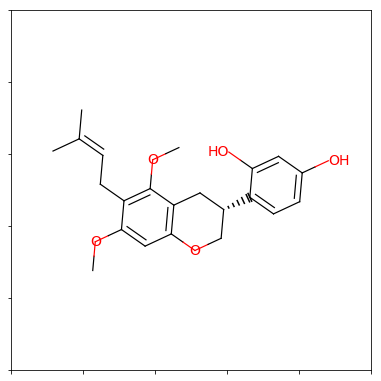

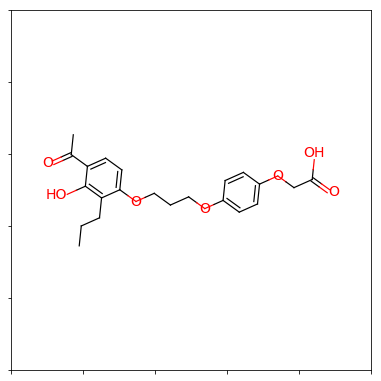

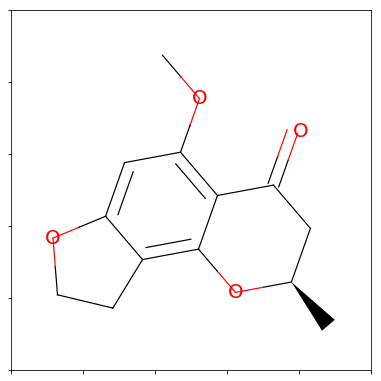

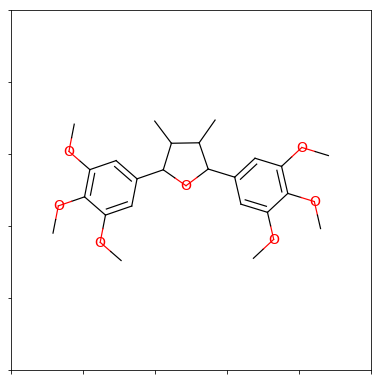

In [83]:
query_id = 110
print(MS_measure.Cdistances_ae[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict1, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "autoencoder")

#### B) PCA
Will calulate 300 dimensional representations of each document using PCA.

In [69]:
MS_measure.get_vectors_pca(300)

In [70]:
MS_measure.get_pca_distances(num_hits=25, method='cosine')

[1.11022302e-16 1.34778035e-01 1.87372251e-01 2.35544399e-01
 3.17293470e-01 3.22967926e-01 3.68596064e-01 4.07776146e-01
 4.14090705e-01 4.18957916e-01]


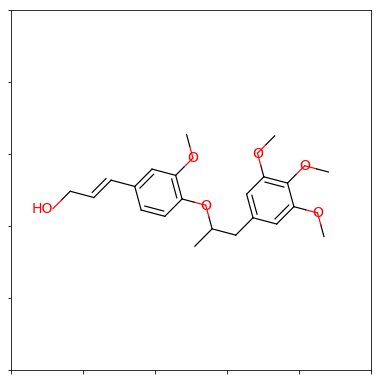

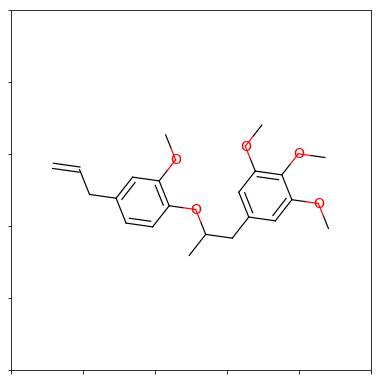

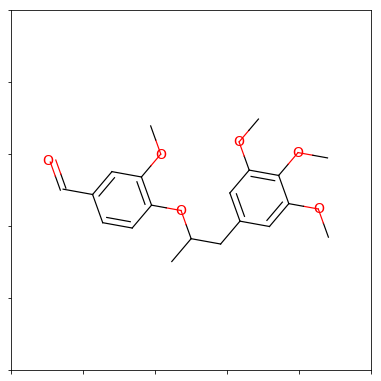

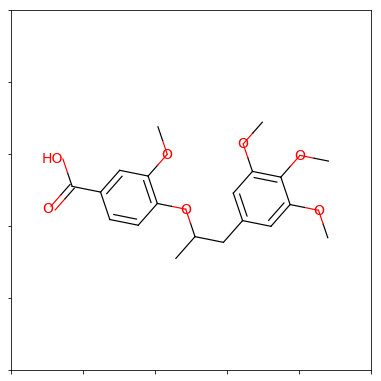

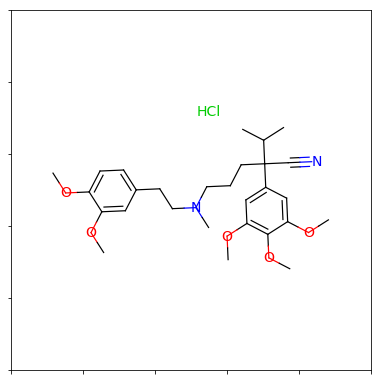

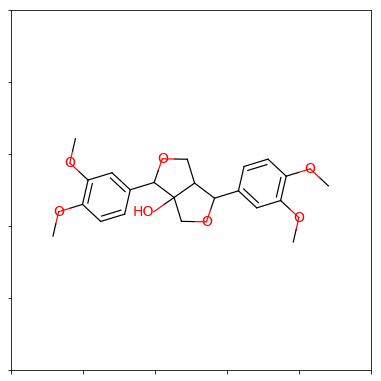

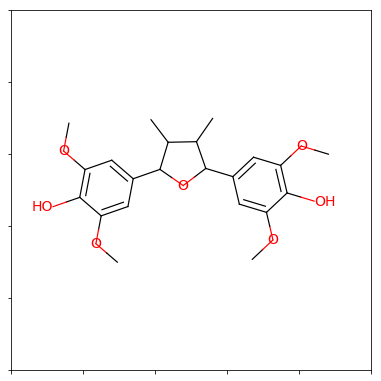

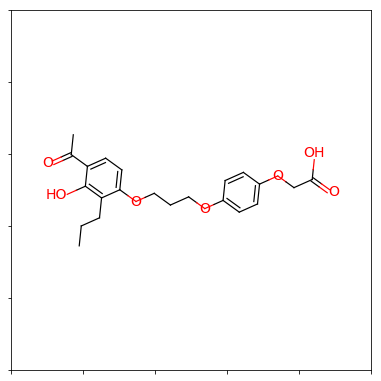

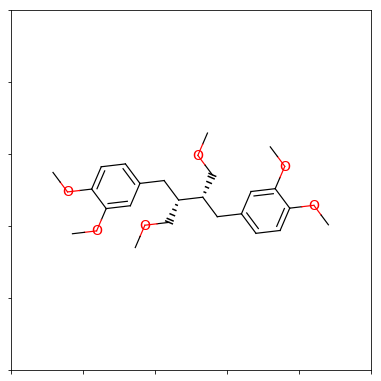

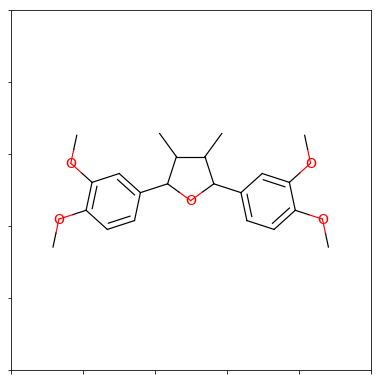

In [84]:
query_id = 110
print(MS_measure.Cdistances_pca[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict1, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "pca")